In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [2]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [5]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [6]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 37s 31ms/step - loss: 0.0515
Epoch 2/100
1198/1198 [==============================] - 29s 24ms/step - loss: 0.0068
Epoch 3/100
1198/1198 [==============================] - 29s 24ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 30s 25ms/step - loss: 0.0049
Epoch 5/100
1198/1198 [==============================] - 30s 25ms/step - loss: 0.0049
Epoch 6/100
1198/1198 [==============================] - 30s 25ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 30s 25ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 29s 25ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 30s 25ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 30s 25ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 30s 25ms/step - loss: 0.0040
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 34s 28ms/step - loss: 0.0020
Epoch 96/100
1198/1198 [==============================] - 38s 32ms/step - loss: 0.0015
Epoch 97/100
1198/1198 [==============================] - 31s 26ms/step - loss: 0.0013
Epoch 98/100
1198/1198 [==============================] - 31s 26ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 31s 26ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 32s 26ms/step - loss: 0.0014


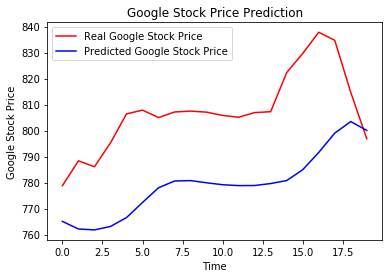

In [7]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()